## Plotting unitary Fermi gas quantities
Plotting quantities using tabulated data and code from Tilman Enss

In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
sys.path.append(str(Path(os.getcwd()).parent))

from general.plot_settings import colors, figsize, paper_settings, generate_plt_styles
plt.rcParams.update(paper_settings)

## Trap distributions

In [2]:
from amo.unitary_fermi_gas import TrappedUnitaryGas

ToTF = 0.3
EF = 15e3
barnu = 300

TUG = TrappedUnitaryGas(ToTF, EF, barnu, verbose=True)

A trapped unitary gas with EF=15000Hz, T/TF=0.30 and barnu=300Hz
has T=4500Hz, kF=1.09e+07 m^-1, lambda_T=5.94e-07m, mu=6750Hz
tau=1.62e-04s, Ns=20833, Ntotal=41667, Epot=267653396Hz.


c:\Users\coldatoms\Documents\cjdGitHub\ChiPyLab\amo\unitary_fermi_gas.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  return (4*pi)/((3*pi**2)* eos_ufg(betamu))**(2/3)


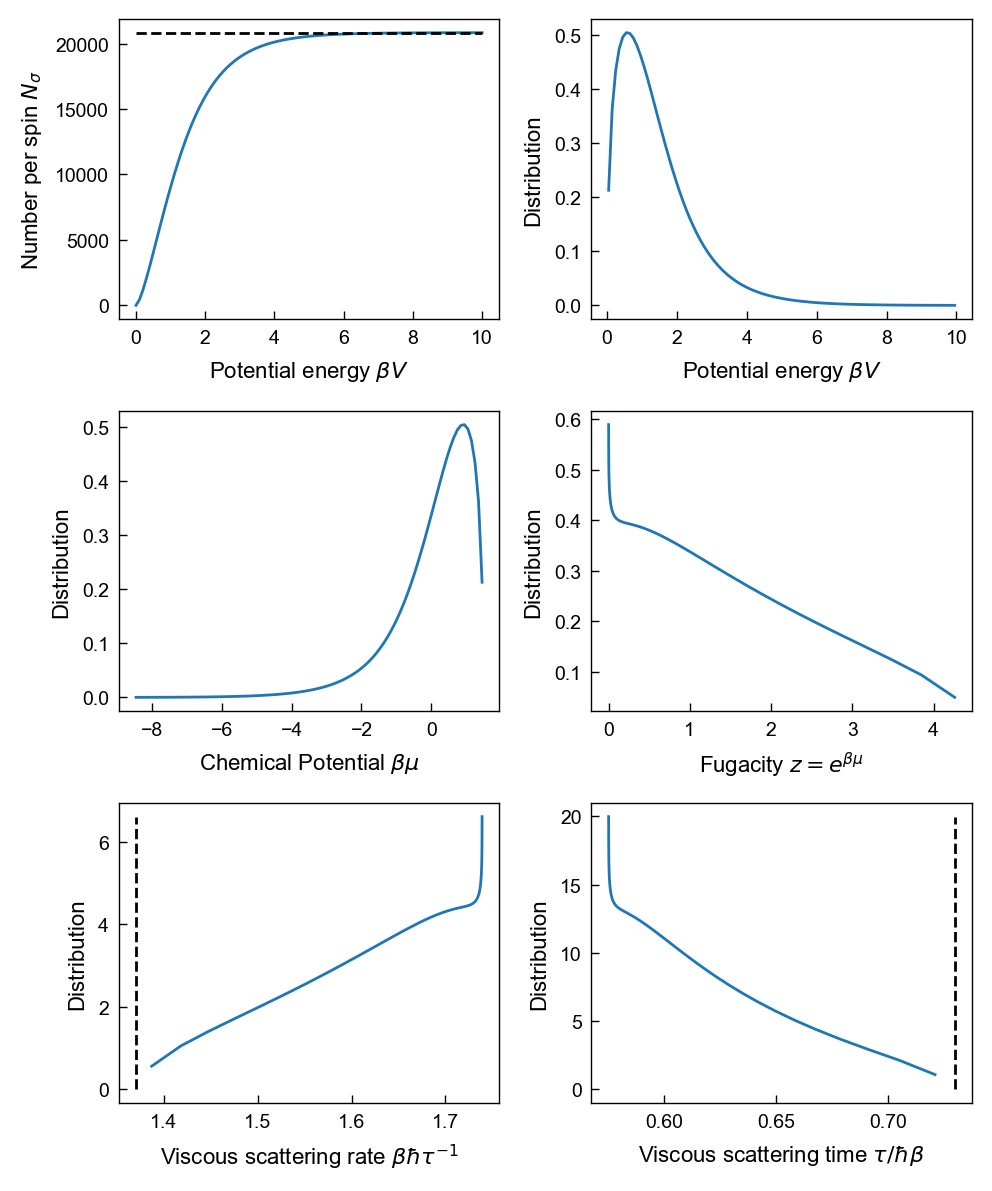

In [6]:
from amo.unitary_fermi_gas import number_per_spin, tau_inv, betagamma

num = 100
Vmax = 10*TUG.T
Vs_edges = np.linspace(0, Vmax, num)

Ns_cdf = np.array([number_per_spin(TUG.betamu, TUG.betabaromega, 
                                  v_max=V/TUG.T) for V in Vs_edges])

Vs = Vs_edges[:-1] + np.diff(Vs_edges)/2  # Mid points
V_pdf = np.diff(Ns_cdf)
norm = np.trapz(V_pdf, dx=Vmax/num/TUG.T)
V_pdf /= norm

xlabel = r'Potential energy $\beta V$'
ylabel = r'Number per spin $N_\sigma$'

fig, axes = plt.subplots(3,2, figsize=(5,6))
axs = axes.flatten()
# fig.suptitle("CDF of atoms in a trapped unitary Fermi gas", fontsize=8)

ax = axs[0]
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.plot(Vs_edges/TUG.T, Ns_cdf)
ax.hlines(TUG.Ns, 0, Vmax/TUG.T, linestyle='--', color='k')

ylabel = r'Distribution'

ax = axs[1]
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.plot(Vs/TUG.T, V_pdf)
# ax.vlines(TUG.Ns, 0, Vmax/EF, linestyle='--', color='k')


### Chemical potential
mus = TUG.betamu - Vs/TUG.T
mu_pdf = V_pdf

xlabel = r'Chemical Potential $\beta\mu$'
ylabel = r'Distribution'

ax = axs[2]
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.plot(mus, mu_pdf)


### Fugacity
zs = np.exp(mus)
z_jacobian = 1/zs
z_pdf = V_pdf * z_jacobian

xlabel = r'Fugacity $z=e^{\beta\mu}$'
ax = axs[3]
ax.set(xlabel=xlabel, ylabel=ylabel)#, xscale='log')
ax.plot(zs, z_pdf)


### gamma
gammas = betagamma(zs)
gamma_jacobian = 1/0.0892  # Ignoring quadratic term.
gamma_pdf = z_pdf * gamma_jacobian

# np.trapz(Ns_pdf/z_pdf*gamma_jacobian, x=gamma_pdf)

xlabel = r'Viscous scattering rate $\beta\hbar \tau^{-1}$'
ylabel = r'Distribution'

ax = axs[4]
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.plot(gammas, gamma_pdf)
ax.vlines(1/TUG.tau/TUG.T, 0, np.max(gamma_pdf), linestyle='--', color='k')


### tau
taus = 1/gammas
tau_jacobian = lambda tau: 1/tau**2
tau_pdf = gamma_pdf * tau_jacobian(taus)

xlabel = r'Viscous scattering time $\tau/\hbar\beta$'
ax = axs[5]
ax.set(xlabel=xlabel, ylabel=ylabel)#, xscale='log')
ax.plot(taus, tau_pdf)
ax.vlines(TUG.tau * TUG.T, 0, np.max(tau_pdf), linestyle='--', color='k')

fig.tight_layout()
plt.show()

In [5]:
print("Checking spectrum normalizations (ignore negative signs).")
print("Potential", np.trapz(V_pdf, x=Vs/TUG.T))
print("Chemical potential mu", np.trapz(mu_pdf, x=mus))
print("Fugacity z", np.trapz(z_pdf, x=zs))
print("Viscous scattering rate, beta gamma", np.trapz(gamma_pdf, x=gammas))
print("Viscous scattering time, tau/beta", np.trapz(tau_pdf, x=taus))

Checking spectrum normalizations (ignore negative signs).
Potential 1.0101010101010102
Chemical potential mu -1.01010101010101
Fugacity z -1.0112760313309412
Viscous scattering rate, beta gamma 0.9552125167423485
Viscous scattering time, tau/beta -0.9558203233420239


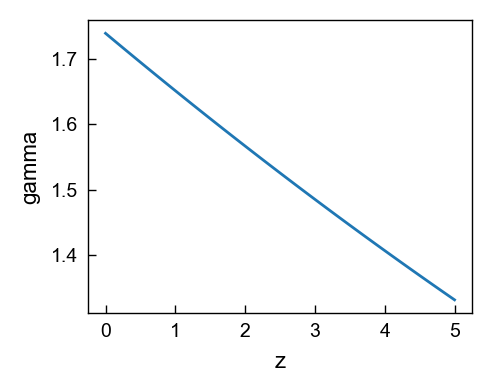

In [9]:
fig, ax = plt.subplots(figsize=(2.5,2))

xlabel = r'z'
ylabel = r'gamma'
ax.set(xlabel=xlabel, ylabel=ylabel)
z = np.linspace(0, 5, 100)
ax.plot(z, betagamma(z))
fig.tight_layout()
plt.show()

### Contact density
From Enss, Haussmann, Zwerger 2011?

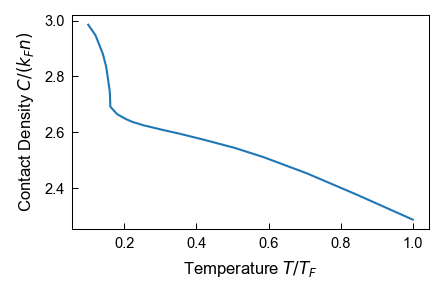

In [9]:
from amo.luttinger_ward_calculations import contact_density

ToTFs = np.linspace(0.1, 1.0, 1000)

xlabel = r'Temperature $T/T_F$'
ylabel = r'Contact Density $C/(k_F n)$'

fig, ax = plt.subplots(figsize=(3,2))

ax.set(xlabel=xlabel, ylabel=ylabel)
ax.plot(ToTFs, contact_density(ToTFs))

fig.tight_layout()

plt.show()


### Trap-averaged contact

In [11]:
from amo.unitary_fermi_gas import trap_averaged_contact

ToTFs = np.linspace(0.1, 1.0, 50)
EF = 10e3  # Hz
barnu = 300  # Hz

Cs = np.array([trap_averaged_contact(*arg) for arg in zip(ToTFs, 
        EF * np.ones_like(ToTFs), barnu * np.ones_like(ToTFs))])


c:\Users\coldatoms\Documents\cjdGitHub\ChiPyLab\amo\unitary_fermi_gas.py:35: RuntimeWarning: divide by zero encountered in scalar divide
  return (4*pi)/((3*pi**2)* eos_ufg(betamu))**(2/3)


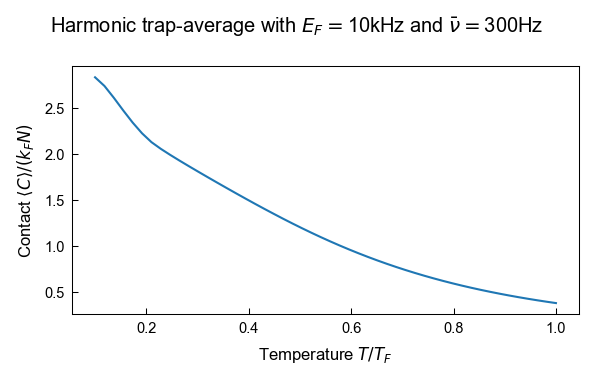

In [14]:
fig, ax = plt.subplots(figsize=(4,2.5))
fig.suptitle(r"Harmonic trap-average with $E_F=$" + f"{EF/1e3:.0f}kHz" \
             + r" and $\bar\nu=$" + f"{barnu:.0f}Hz")

## Trap-averaged contact
xlabel = r'Temperature $T/T_F$'
ylabel = r'Contact $\langle C \rangle/(k_F N)$'

ax.set(xlabel=xlabel, ylabel=ylabel)
ax.plot(ToTFs, Cs)

fig.tight_layout()

plt.show()

In [3]:
from amo.unitary_fermi_gas import trap_averaged_contact, trap_averaged_contact_slope
from amo.luttinger_ward_calculations import scale_susceptibility
import pandas as pd

file = 'luttward-thermodyn.txt'
df = pd.read_csv(os.path.join('..', 'data', file), skiprows=4, sep=' ')

df = df[df['T/T_F'] < 1.2]
df = df[df['T/T_F'] > 0.1]

ToTFs = df['T/T_F']

# ToTFs = np.linspace(0.1, 1.0, 50)
EF = 10e3  # Hz
barnu = 300  # Hz

Cs = np.array([trap_averaged_contact(*arg) for arg in zip(ToTFs, 
        EF * np.ones_like(ToTFs), barnu * np.ones_like(ToTFs))])

file = 'sumrule-bulk-ufg.txt'
df = pd.read_csv(os.path.join('..', 'data', file), skiprows=3, sep=' ')
df_label = 'S(T)(k_Fa)^2/(n*EF)'

df = df[df['T/T_F'] < 1.2]
df = df[df['T/T_F'] > 0.10]

Ss = df[df_label]

Cslopes = np.array([trap_averaged_contact_slope(*arg) for arg in zip(ToTFs, 
        EF * np.ones_like(ToTFs), barnu * np.ones_like(ToTFs))])


c:\Users\coldatoms\Documents\cjdGitHub\ChiPyLab\amo\unitary_fermi_gas.py:35: RuntimeWarning: divide by zero encountered in scalar divide
  return (4*pi)/((3*pi**2)* eos_ufg(betamu))**(2/3)
c:\Users\coldatoms\Documents\cjdGitHub\ChiPyLab\amo\unitary_fermi_gas.py:35: RuntimeWarning: divide by zero encountered in scalar divide
  return (4*pi)/((3*pi**2)* eos_ufg(betamu))**(2/3)


ValueError: x and y must have same first dimension, but have shapes (19,) and (13,)

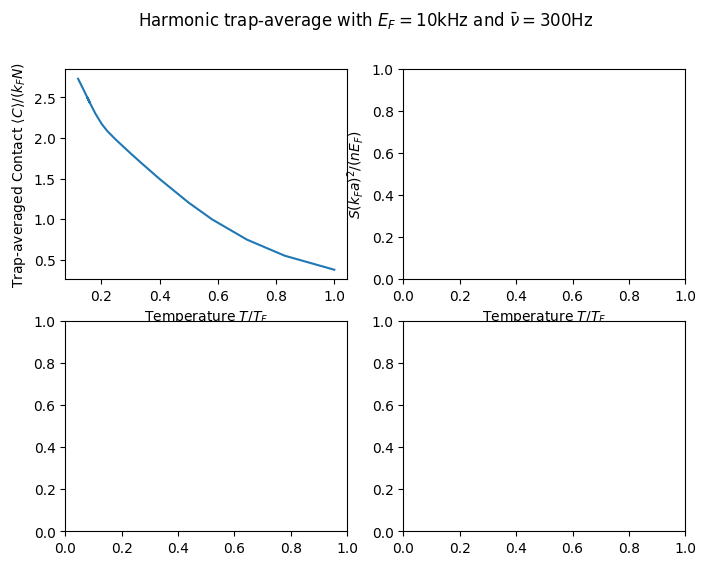

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axs = axes.flatten()
fig.suptitle(r"Harmonic trap-average with $E_F=$" + f"{EF/1e3:.0f}kHz" \
             + r" and $\bar\nu=$" + f"{barnu:.0f}Hz")

## Trap-averaged contact
ax = axs[0]
xlabel = r'Temperature $T/T_F$'
ylabel = r'Trap-averaged Contact $\langle C \rangle/(k_F N)$'

ax.set(xlabel=xlabel, ylabel=ylabel)
ax.plot(ToTFs, Cs)


## Scale susceptibility
ax = axs[1]
ylabel = r'$S(k_F a)^2/(n E_F)$'

ax.set(xlabel=xlabel, ylabel=ylabel)
ax.plot(ToTFs, Ss)


## Trap-averaged contact slope
ax = axs[2]
ylabel = r'$d\langle C \rangle/d(k_F a)^{-1}$'

ax.set(xlabel=xlabel, ylabel=ylabel)
ax.plot(ToTFs, Cslopes)


fig.tight_layout()

plt.show()

In [5]:
ToTFs = np.linspace(0.2, 1.2, 29)

Cs = np.array([trap_averaged_contact(*arg) for arg in zip(ToTFs, 
        EF * np.ones_like(ToTFs), barnu * np.ones_like(ToTFs))])


In [6]:
Cs

array([2.1783244 , 2.02855915, 1.90539411, 1.78810748, 1.67342239,
       1.56085269, 1.45088512, 1.34443262, 1.24180172, 1.14444157,
       1.05270978, 0.96701767, 0.88750127, 0.81417138, 0.74688656,
       0.68537897, 0.62934843, 0.57842509, 0.53227651, 0.49047896,
       0.45264838, 0.41839089, 0.38739359, 0.35932629, 0.33388573,
       0.31080807, 0.28985089, 0.27077148, 0.25339308])

In [7]:
Cs

array([2.1783244 , 2.02855915, 1.90539411, 1.78810748, 1.67342239,
       1.56085269, 1.45088512, 1.34443262, 1.24180172, 1.14444157,
       1.05270978, 0.96701767, 0.88750127, 0.81417138, 0.74688656,
       0.68537897, 0.62934843, 0.57842509, 0.53227651, 0.49047896,
       0.45264838, 0.41839089, 0.38739359, 0.35932629, 0.33388573,
       0.31080807, 0.28985089, 0.27077148, 0.25339308])

In [8]:
2.178*np.sqrt(2)


np.float64(3.0801571388486013)